# Github

[Repository](https://github.com/longluv1605/finding-counting-object)

# 1. Thêm các thư viện cần thiết

Ở đây, chúng ta sẽ sử dụng `opencv2` cho việc xử lý hình ảnh, `matplotlib` để show ảnh, và một số thư viện phụ trợ khác.

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import glob
import math
from tqdm import tqdm

# 2. Tải hình ảnh để sử dụng

Đọc ảnh cần tìm vật và chọn thử 1 đồ vật để hiển thị xem chúng như thế nào.

In [2]:
def show_image(image, figsize=None):
    if figsize is not None:
        plt.figure(figsize=figsize)
    if len(image.shape) > 2:
        image = image[...,::-1]
    plt.imshow(image)
    plt.axis('off')

def show(to_show, figsize=(10, 10), plot_size=None):
    """
    Hiển thị một hoặc nhiều ảnh bằng Matplotlib.

    Nếu chỉ có một ảnh, hàm sẽ hiển thị ảnh duy nhất đó.
    Nếu có nhiều ảnh, hàm sẽ hiển thị theo lưới (grid) con dựa trên `plot_size` (nếu được cung cấp).

    Args:
        images (list of np.ndarray): Danh sách ảnh để hiển thị.
        figsize (tuple of int, optional): Kích thước của figure. Mặc định là (10, 10).
        plot_size (tuple of int, optional): Kích thước lưới hiển thị, dạng (rows, cols).
            Nếu không được truyền vào, ảnh sẽ được hiển thị tuần tự trên các subplot liên tiếp.

    Returns:
        None: Hàm không trả về giá trị, chỉ hiển thị ảnh bằng matplotlib.
    """
    
    
    # If you want to show only one image.
    if not isinstance(to_show, list):
        plt.figure(figsize=figsize)
        show_image(to_show)
        return
    
    # Else
    n = len(to_show)
    if plot_size is None:
        cols = int(math.ceil(math.sqrt(n)))
        rows = int(math.ceil(n / cols))
    else:
        rows, cols = plot_size

    # Hiển thị tuần tự
    plt.figure(figsize=figsize)
    for i, image in enumerate(to_show):
        plt.subplot(rows, cols, i + 1)
        show_image(image)
        
    # Ẩn các subplot dư (nếu hàng*cột > n)
    for idx in range(n, rows * cols):
        plt.subplot(rows, cols, idx + 1)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

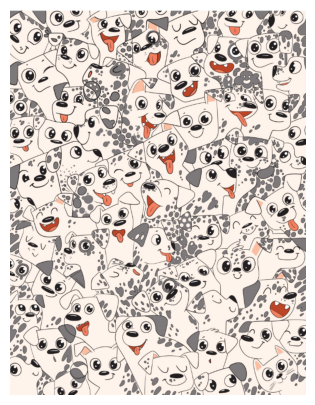

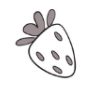

In [3]:
image = cv2.imread(f'Finding/2/image.png') # Ảnh cần tìm vật
template = cv2.imread(f'Finding/2/t1.png') # Template được chọn

show(image, figsize=(8, 5))
show(template, figsize=(1, 1))

Bây giờ hãy thử lấy ra toàn bộ template cần tìm và hiển thị chúng.

In [4]:
def get_all_templates(dir, name_tag='t'):
    """
    Đọc tất cả file ảnh trong thư mục `dir` có tên bắt đầu với `name_tag`
    và phần mở rộng .png. Trả về danh sách các ảnh (templates).
    
    Args:
        dir (str): Đường dẫn đến thư mục chứa ảnh.
        name_tag (str, optional): Tiền tố dùng để lọc tên file. Mặc định là 't'.
    
    Returns:
        list[np.ndarray]: Danh sách các ảnh (templates) được đọc (dưới dạng numpy array).
    """
    pattern = os.path.join(dir, f"{name_tag}*.png")
    file_list = sorted(glob.glob(pattern))

    templates = []
    for path in file_list:
        template = cv2.imread(path)
        templates.append(template)
    
    return templates

Finding set 1:


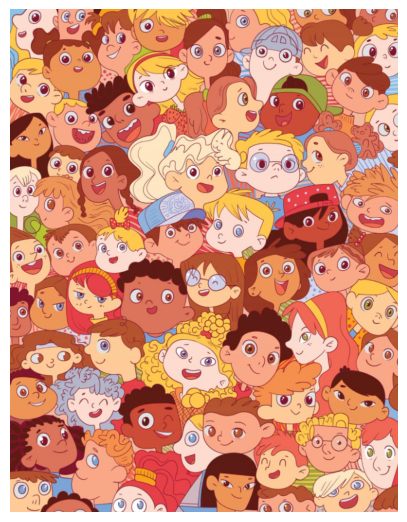

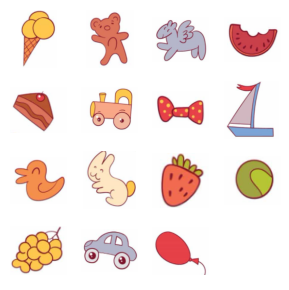

Finding set 2:


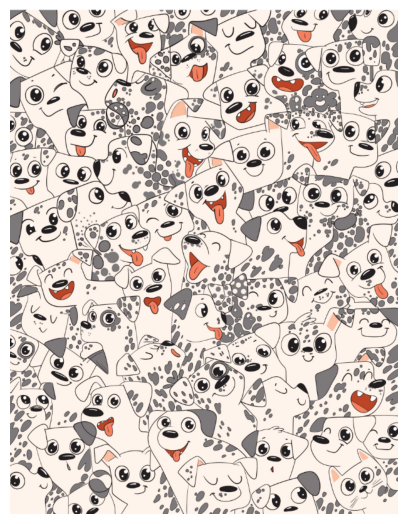

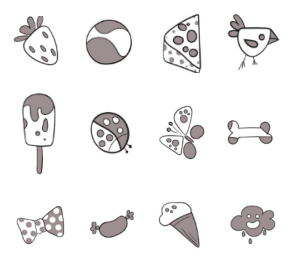

In [5]:
images = [cv2.imread(f'Finding/{i + 1}/image.png') for i in range(2)]

templates = [get_all_templates(f'Finding/{i + 1}') for i in range(2)]

print('Finding set 1:')
show(images[0], figsize=(5, 8))
show(templates[0], figsize=(3, 3))

print('Finding set 2:')
show(images[1], figsize=(5, 8))
show(templates[1], figsize=(3, 3))

Ở trên là ảnh ở dạng RGB. Tuy nhiên ta nên chuyển ảnh sang dạng ảnh mức xám, vì:

1. Tăng tốc độ xử lý: Ảnh màu có 3 kênh (RGB), trong khi ảnh xám chỉ có 1 kênh, giúp giảm tài nguyên tính toán.  
2. Ổn định hơn với thay đổi màu sắc: Grayscale giúp tập trung vào hình dạng thay vì màu sắc, tránh nhiễu do thay đổi ánh sáng.  
3. Độ tương phản quan trọng hơn màu sắc: Các phương pháp so khớp dựa vào cường độ pixel thay vì màu sắc, nên ảnh xám cho kết quả chính xác hơn.  

Ta chỉ giữ ảnh màu khi cần so khớp theo từng kênh hoặc màu sắc là yếu tố quan trọng.

In [6]:
def convert_color(images, color='rgb'):
    """
    Chuyển đổi không gian màu cho một ảnh hoặc danh sách ảnh sang không gian màu chỉ định.

    Args:
        images (numpy.ndarray | list): Ảnh đầu vào hoặc danh sách ảnh.
        color (str, optional): Kiểu màu muốn chuyển, như 'rgb' hoặc 'gray'. Mặc định là 'rgb'.

    Returns:
        numpy.ndarray | list: Ảnh (hoặc danh sách ảnh) sau khi chuyển đổi màu.
    """
    if not isinstance(images, list):
        return cv2.cvtColor(images, color)
    
    res = []
    for image in images:
        res.append(cv2.cvtColor(image, color))
    return res

Finding set 1:


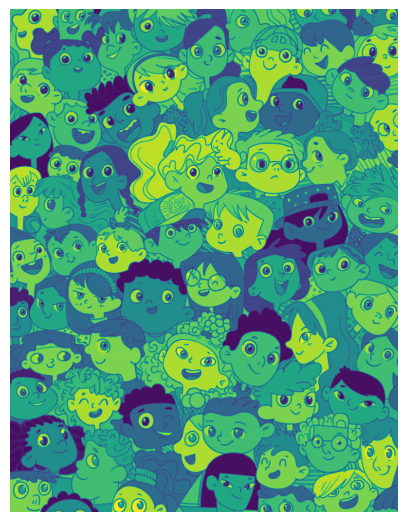

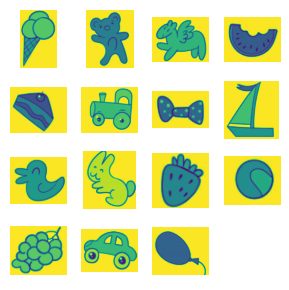

Finding set 2:


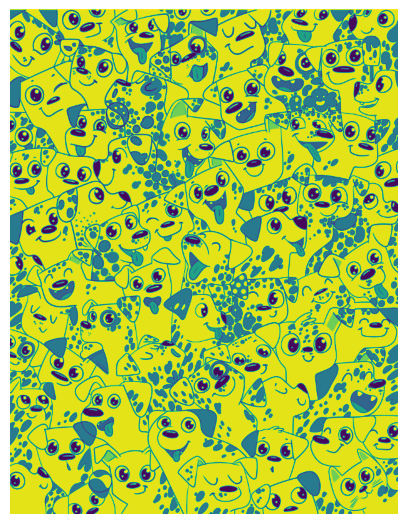

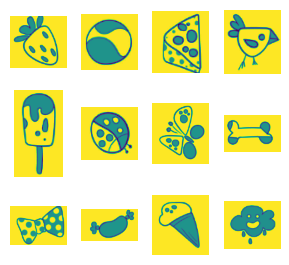

In [7]:
# Chuyển sang ảnh mức xám
gray_images = convert_color(images, cv2.COLOR_BGR2GRAY)
gray_templates = [convert_color(template_set, cv2.COLOR_BGR2GRAY) for template_set in templates]

print('Finding set 1:')
show(gray_images[0], figsize=(5, 8))
show(gray_templates[0], figsize=(3, 3))

print('Finding set 2:')
show(gray_images[1], figsize=(5, 8))
show(gray_templates[1], figsize=(3, 3))

# 3. Finding

Yêu cầu của bài toán là tìm vật thể trong ảnh, vì vậy chúng ta sẽ hướng đến các phương pháp matching để tìm ra vị trí của vật thể.

Mô hình hóa: $$F(I, t) = (x, y, x', y')$$
Trong đó:
 - I: hình ảnh chứa vật cần tìm
 - t: vật cần tìm
 - x, y: tọa độ góc trên bên trái, xét trong I
 - x', y': tọa độ góc dưới bên phải, xét trong I

## 3.1 Thử cách đơn giản

Đầu tiên, chúng ta sẽ thử dùng template matching mà không điều chỉnh hay xử lý gì thêm.

In [8]:
def match_template(image, template, meth, mask=None):
    """
    Thực hiện template matching với một phương pháp duy nhất trên một cặp ảnh/mặt nạ.
    Trả về dict chứa vị trí top_left/bottom_right và các giá trị min_val, max_val.
    """
    # Lấy constant của OpenCV từ meth (VD: CV_TM_CCOEFF, ...)
    method = getattr(cv2, meth)
    # Truyền thêm mask nếu cần
    if mask is not None and method in [cv2.TM_SQDIFF, cv2.TM_CCORR]:
        res = cv2.matchTemplate(image, template, method, mask=mask)
    else:
        res = cv2.matchTemplate(image, template, method)
        
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    # Tùy vào phương pháp, top_left sẽ là min_loc hoặc max_loc
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
        best_value = min_val
    else:
        top_left = max_loc
        best_value = max_val

    h, w = template.shape[:2]
    bottom_right = (top_left[0] + w, top_left[1] + h)

    return {
        "top_left": top_left,
        "bottom_right": bottom_right,
        "min_val": min_val,
        "max_val": max_val,
        "best_value": best_value,
        "method": meth
    }

In [9]:
def draw_bounding_box(image, match_result, color=(0, 0, 0), in_place=False, thickness=4):
    """
    Vẽ bounding box trực tiếp lên ảnh dựa trên kết quả match_result
    rồi trả về ảnh kết quả. Không sử dụng matplotlib để hiển thị.

    Args:
        image (np.ndarray): Ảnh gốc (BGR hoặc grayscale).
        match_result (dict | list[dict]):
            - dict: dạng {
                 "top_left": (x, y),
                 "bottom_right": (x, y),
                 "min_val": float,
                 "max_val": float,
                 "best_value": float,
                 "method": str (tuỳ chọn)
              }
            - list[dict]: danh sách các dict giống trên.

    Returns:
        np.ndarray: Ảnh đã được vẽ bounding box (cùng kích thước với ảnh gốc).
    """
    import cv2

    # Nếu match_result là dict, gói thành danh sách để nạp vòng lặp
    if isinstance(match_result, dict):
        match_result = [match_result]

    if in_place:
        image_to_draw = image
    else:
        image_to_draw = image.copy()

    # Vẽ bounding box cho từng dict
    for res in match_result:
        top_left = res["top_left"]
        bottom_right = res["bottom_right"]
        cv2.rectangle(image_to_draw, top_left, bottom_right, color, thickness)

    return image_to_draw

Thử thực hiện matching đơn giản với SQDIFF (sum of squared difference), CCOEFF (correlation coefficient) và CCORR (cross-correlation) để đánh giá kết quả.

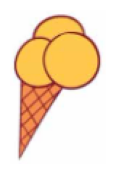

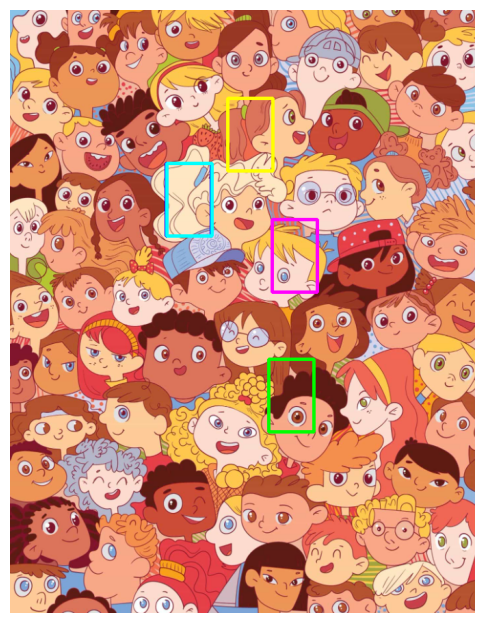

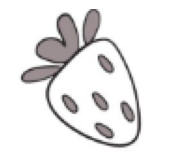

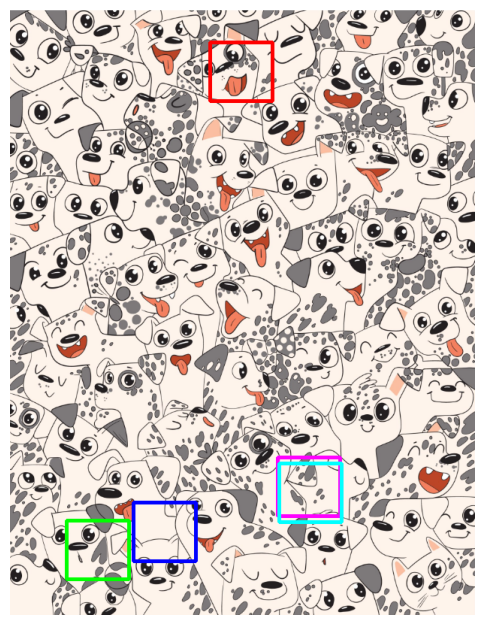

In [10]:
methods = [
    "TM_CCOEFF",
    "TM_CCOEFF_NORMED",
    "TM_CCORR",
    "TM_CCORR_NORMED",
    "TM_SQDIFF",
    "TM_SQDIFF_NORMED"
]

# Một số màu ví dụ
colors = [
    (255, 0, 0),   # Đỏ
    (0, 255, 0),   # Xanh lá
    (0, 0, 255),   # Xanh dương
    (255, 255, 0), # Vàng
    (255, 0, 255), # Hồng
    (0, 255, 255)  # Xanh biển
]

results = []
for i, image in enumerate(images):
    img_res = image.copy()
    for j, method in enumerate(methods):
        match_result = match_template(gray_images[i], gray_templates[i][0], method)
        color = colors[j][::-1]
        img_res = draw_bounding_box(img_res, match_result, color, in_place=True, thickness=4)
    results.append(img_res)

for i in range(2):
    show(templates[i][0], figsize=(2, 2))
    show(results[i], figsize=(6, 10))

Có thể thấy rằng kết quả không tốt chút nào, toàn bộ các phương pháp đều tìm sai. Vậy cần phải xác định được nguyên nhân.

| | Nguyên nhân | Giải pháp đề xuất |
|-|-------------|-------------------|
|1| Sự khác biệt giữa kích thước của vật cần tìm với kích thước của vật đó trong ảnh, do đề bài và quá trình cắt ảnh | Sử dụng multiscale template matching |
|2| Sự khác biệt về vùng xung quanh vật trong template và trong image | Sử dụng masking để loại bỏ vùng không cần thiết |

## 3.2 Cải tiến cách vừa rồi

Từ những vấn đề vừa xác định ở trên, tiếp theo chúng ta sẽ thực hiện masking (xóa bỏ background của template) và sau đó thực hiện template matching trên nhiều scale khác nhau của template đó.

In [11]:
def create_expanded_mask(img, threshold_value=240):
    """
    Tạo mask nhị phân bằng ngưỡng, và mở rộng nó thêm 2 đơn vị
    (để phù hợp floodFill).
    """
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, mask_bin = cv2.threshold(gray, threshold_value, 255, cv2.THRESH_BINARY)
    mask_bin = cv2.bitwise_not(mask_bin)

    h, w = gray.shape
    mask_expanded = np.zeros((h + 2, w + 2), np.uint8)
    mask_expanded[1:-1, 1:-1] = mask_bin

    return mask_expanded

def flood_fill_edges(channel, mask_expanded, lo_diff=20, up_diff=20):
    """
    Sử dụng floodFill cho từng kênh, duyệt qua tất cả điểm trên 4 cạnh
    để lấp toàn bộ nền liên thông.
    """
    h, w = channel.shape[:2]
    temp_mask = mask_expanded.copy()

    # Top row & bottom row
    for x in range(w):
        cv2.floodFill(channel, temp_mask, (x, 0), 0, loDiff=(lo_diff,)*3, upDiff=(up_diff,)*3)
        cv2.floodFill(channel, temp_mask, (x, h - 1), 0, loDiff=(lo_diff,)*3, upDiff=(up_diff,)*3)

    # Left column & right column
    for y in range(h):
        cv2.floodFill(channel, temp_mask, (0, y), 0, loDiff=(lo_diff,)*3, upDiff=(up_diff,)*3)
        cv2.floodFill(channel, temp_mask, (w - 1, y), 0, loDiff=(lo_diff,)*3, upDiff=(up_diff,)*3)

    return channel

def remove_bg(templates, lo_diff=20, up_diff=20, threshold_value=240):
    """
    Loại bỏ background của danh sách vật thể (templates) bằng kỹ thuật floodFill
    với seed points trên 4 cạnh của ảnh, sau đó thực hiện morphological opening.

    Args:
        templates (list of np.ndarray]): Danh sách ảnh BGR cần xử lý.
        lo_diff (int): Ngưỡng sai khác màu dưới.
        up_diff (int): Ngưỡng sai khác màu trên.

    Returns:
        list of np.ndarray: Ảnh đã xóa nền (vùng nền được tô đen).
    """
    results = []
    for template in templates:
        if template is None:
            results.append(None)
            continue

        # Tạo mask expanded
        mask_expanded_original = create_expanded_mask(template, threshold_value)

        # Tách kênh B, G, R
        b, g, r = cv2.split(template)

        # Flood fill trên từng kênh
        b = flood_fill_edges(b, mask_expanded_original, lo_diff, up_diff)
        g = flood_fill_edges(g, mask_expanded_original, lo_diff, up_diff)
        r = flood_fill_edges(r, mask_expanded_original, lo_diff, up_diff)

        # Gộp lại
        merged = cv2.merge((b, g, r))

        # Morphological opening (loại bỏ nhiễu)
        kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
        merged = cv2.morphologyEx(merged, cv2.MORPH_OPEN, kernel)

        results.append(merged)

    return results

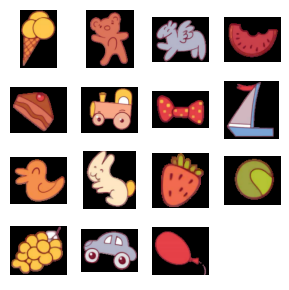

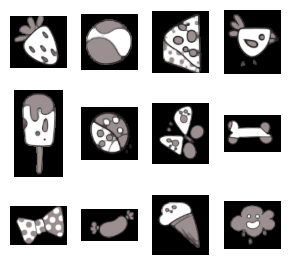

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [12]:
rmgb_templates = [remove_bg(template_set) for template_set in templates]
for template_set in rmgb_templates:
    show(template_set, figsize=(3, 3))
rmgb_templates[0][0][..., 0]

Như vậy là ta đã xóa được background của template, phương pháp trên đạt độ chính xác rất cao, đã đáp ứng mong muốn hiện thời.

Tiếp theo, chúng ta sẽ tiến hành sử dụng template matching với nhiều scale khác nhau cho vật cần tìm. Sử dụng masking với từ ảnh đã loại bỏ background để bỏ qua phần nhiễu ảnh hưởng đến kết quả

In [36]:
def prepare_template_and_mask(template, img_color_space):
    """
    Nếu ảnh gốc là grayscale thì chuyển template sang gray.
    Ngược lại vẫn dùng template gốc, đồng thời tạo mask bằng ngưỡng trên ảnh gray.
    """
    # Nếu ảnh gốc là gray
    if img_color_space == 'gray':
        template_gray = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
        template_used = template_gray
    else:
        # Ảnh gốc là color
        template_used = template
        template_gray = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)

    # Tạo mask foreground bằng threshold
    _, mask = cv2.threshold(template_gray, 5, 255, cv2.THRESH_BINARY)
    return template_used, mask

def search_best_scale(img, template_used, mask, meth, scales, show_progress=True):
    """
    Duyệt qua các 'scales' để resize template và mask,
    gọi lại hàm match_template để lấy kết quả,
    trả về (best_loc, best_scale, best_min_val, best_max_val).
    """
    h, w = template_used.shape[:2]
    method = getattr(cv2, meth)

    # Xác định giá trị khởi tạo tùy vào phương pháp
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        best_val = float('inf')
    else:
        best_val = float('-inf')

    best_loc, best_scale = None, None
    best_min_val, best_max_val = None, None

    iterator = tqdm(scales, unit='scale', desc='\t') if show_progress else scales
    
    # Duyệt qua từng scale để chọn kết quả hợp lý nhất
    for scale in iterator:
        new_h, new_w = int(h * scale), int(w * scale)
        if new_h < 1 or new_w < 1:
            continue  # Bỏ qua nếu scale làm template về kích thước <= 0

        template_resized = cv2.resize(template_used, (new_w, new_h), interpolation=cv2.INTER_LINEAR)
        mask_resized = cv2.resize(mask, (new_w, new_h), interpolation=cv2.INTER_LINEAR)

        # Gọi hàm match_template đã viết
        res_dict = match_template(img, template_resized, meth, mask=mask_resized)
        min_val, max_val = res_dict["min_val"], res_dict["max_val"]
        loc = res_dict["top_left"]
        cur_best_value = res_dict["best_value"]

        # Cập nhật kết quả tốt nhất
        if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
            if cur_best_value < best_val:
                best_val = cur_best_value
                best_loc = loc
                best_scale = scale
                best_min_val = min_val
                best_max_val = max_val
        else:
            if cur_best_value > best_val:
                best_val = cur_best_value
                best_loc = loc
                best_scale = scale
                best_min_val = min_val
                best_max_val = max_val

    return best_loc, best_scale, best_min_val, best_max_val

def compute_bounding_box(best_loc, best_scale, w, h):
    """
    Tính toạ độ góc trên - trái và dưới - phải cho bounding box dựa trên best_scale.
    """
    top_left = best_loc
    h_resize = int(h * best_scale)
    w_resize = int(w * best_scale)
    bottom_right = (top_left[0] + w_resize, top_left[1] + h_resize)
    return top_left, bottom_right

def template_matching_best_scale(templates, img, meth, scales, show_progress=True):
    """
    Thực hiện Template Matching với nhiều scale khác nhau trên danh sách template.

    Args:
        templates (list of np.ndarray): Danh sách các template cần tìm trên ảnh.
        img (np.ndarray): Ảnh gốc để thực hiện template matching.
        meth (str): Tên phương pháp template matching, ví dụ "TM_CCOEFF_NORMED".
        scales (list of float): Danh sách tỉ lệ scale để resize (vd: [0.5, 1.0, 1.5]).

    Returns:
        list of dict: Mỗi phần tử chứa thông tin bounding box:
        {
            "top_left": (x, y),
            "bottom_right": (x, y),
            "min_val": float,
            "max_val": float,
            "best_value": float,
            "method": str
        }
    """

    # Xác định kiểu ảnh gốc (color hoặc gray)
    img_color_space = 'rgb' if len(img.shape) > 2 else 'gray'

    results = []
    for i, template in enumerate(templates):
        if show_progress:
            print(f'Template {i + 1}/{len(templates)}')

        # Chuẩn bị template và mask
        template_used, mask = prepare_template_and_mask(template, img_color_space)

        # Tìm best_loc, best_scale
        best_loc, best_scale, best_min_val, best_max_val = search_best_scale(
            img, template_used, mask, meth, scales, show_progress
        )

        # Tính bounding box
        h, w = template_used.shape[:2]
        top_left, bottom_right = compute_bounding_box(best_loc, best_scale, w, h)

        # Xác định best_value
        if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
            best_value = best_min_val
        else:
            best_value = best_max_val

        # Lưu dict kết quả
        results.append({
            "top_left": top_left,
            "bottom_right": bottom_right,
            "min_val": best_min_val,
            "max_val": best_max_val,
            "best_value": best_value,
            "method": meth
        })

    return results

14


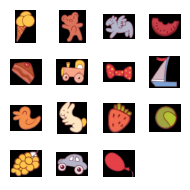

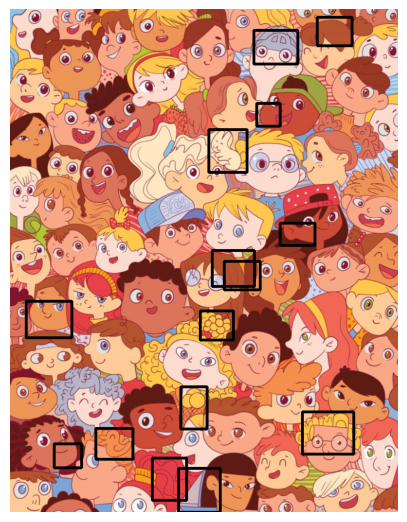

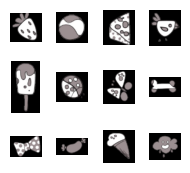

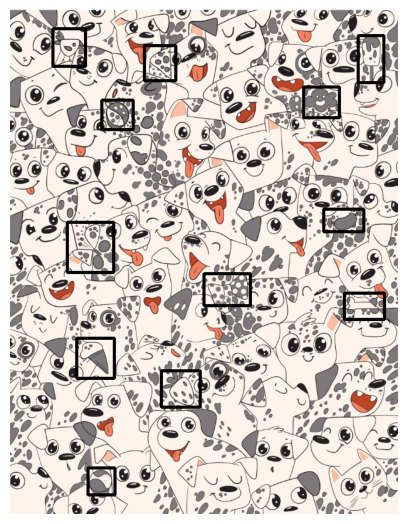

In [62]:
scales = np.arange(1.3, 0.6, -0.05)
print(len(scales))

methods = [
    "TM_SQDIFF"
]

for image, gray_image, template_set in zip(images, gray_images, rmgb_templates):
    img_res = image.copy()
    for i, method in enumerate(methods):
        match_result = template_matching_best_scale(templates=template_set, meth=method, img=gray_image, scales=scales, show_progress=False)
        img_res = draw_bounding_box(img_res, match_result)   
    show(template_set, figsize=(2, 2)) 
    show(img_res, figsize=(5, 9))

38


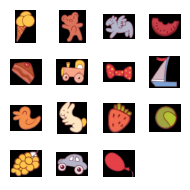

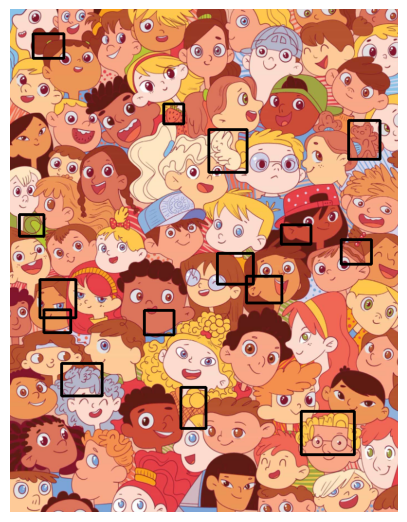

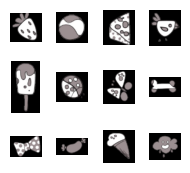

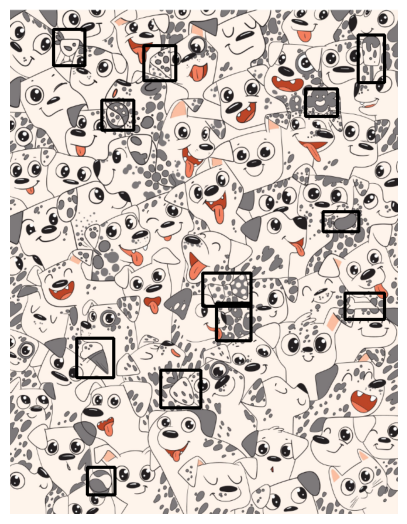

In [53]:
scales = np.arange(1.3, 0.55, -0.02)
print(len(scales))

methods = [
    "TM_SQDIFF"
]

for image, gray_image, template_set in zip(images, gray_images, rmgb_templates):
    img_res = image.copy()
    for i, method in enumerate(methods):
        match_result = template_matching_best_scale(templates=template_set, meth=method, img=gray_image, scales=scales, show_progress=False)
        img_res = draw_bounding_box(img_res, match_result)   
    show(template_set, figsize=(2, 2)) 
    show(img_res, figsize=(5, 9))

In [41]:
def debug(templates, img, meth, scales):
    # Xác định kiểu ảnh gốc (color hoặc gray)
    img_color_space = 'rgb' if len(img.shape) > 2 else 'gray'

    results = []
    for i, template in enumerate(templates):
        # Chuẩn bị template và mask
        template_used, mask = prepare_template_and_mask(template, img_color_space)

        # Tìm best_loc, best_scale
        h, w = template_used.shape[:2]
        method = getattr(cv2, meth)

        # Khởi tạo giá trị best
        if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
            best_val = float('inf')
        else:
            best_val = float('-inf')

        # Danh sách lưu thông tin debug
        debug_info = []

        for scale in scales:
            new_h, new_w = int(h * scale), int(w * scale)
            if new_h < 1 or new_w < 1:
                continue

            # Resize template & mask
            template_resized = cv2.resize(template_used, (new_w, new_h), interpolation=cv2.INTER_LINEAR)
            mask_resized = cv2.resize(mask, (new_w, new_h), interpolation=cv2.INTER_LINEAR)

            # Gọi match_template
            res_dict = match_template(img, template_resized, meth, mask=mask_resized)
            loc = res_dict["top_left"]
            cur_best_value = res_dict["best_value"]

            changed = False
            # Cập nhật "best"
            if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
                if cur_best_value < best_val:
                    changed = True
                    best_val = cur_best_value
            else:
                if cur_best_value > best_val:
                    changed = True
                    best_val = cur_best_value
            
            # Lấy vùng match (ROI) quanh loc trên ảnh gốc
            roi = None
            y, x = loc[1], loc[0]  # loc = (x, y)
            if (y >= 0 and y + new_h <= img.shape[0]) and (x >= 0 and x + new_w <= img.shape[1]):
                roi = img[y:y+new_h, x:x+new_w]    
                   
            # Lưu debug
            debug_info.append({
                "scale": scale,
                "template_resized": template_resized,
                "roi": roi,
                "value": cur_best_value,
                "changed": changed
            })

        # Lưu dict kết quả
        results.append(debug_info)

    return results

Scales chọn là `scales = np.arange(1.3, 0.55, -0.02)`

Template được chọn là con thuyền (7) của ảnh 1, và con bướm (6) của ảnh 2

38
Scale = 1.30 || Value = 27878754.00 || Changed = True


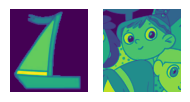

Scale = 1.28 || Value = 28603190.00 || Changed = False


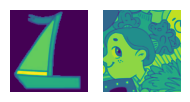

Scale = 1.26 || Value = 28554896.00 || Changed = False


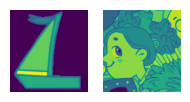

Scale = 1.24 || Value = 26587438.00 || Changed = True


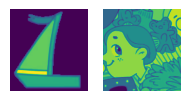

Scale = 1.22 || Value = 25738052.00 || Changed = True


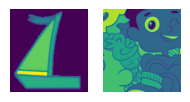

Scale = 1.20 || Value = 23972948.00 || Changed = True


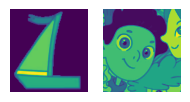

Scale = 1.18 || Value = 24102038.00 || Changed = False


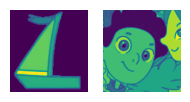

Scale = 1.16 || Value = 21902230.00 || Changed = True


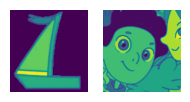

Scale = 1.14 || Value = 20975200.00 || Changed = True


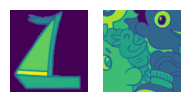

Scale = 1.12 || Value = 19460152.00 || Changed = True


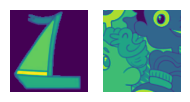

Scale = 1.10 || Value = 19217070.00 || Changed = True


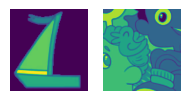

Scale = 1.08 || Value = 17426774.00 || Changed = True


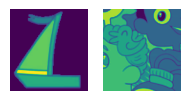

Scale = 1.06 || Value = 16566539.00 || Changed = True


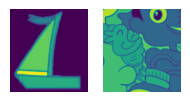

Scale = 1.04 || Value = 15289204.00 || Changed = True


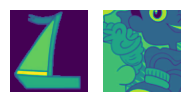

Scale = 1.02 || Value = 14595577.00 || Changed = True


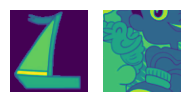

Scale = 1.00 || Value = 15610425.00 || Changed = False


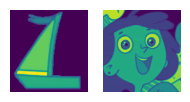

Scale = 0.98 || Value = 14683706.00 || Changed = False


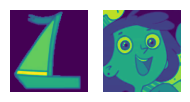

Scale = 0.96 || Value = 14018260.00 || Changed = True


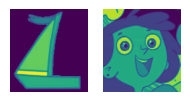

Scale = 0.94 || Value = 12536886.00 || Changed = True


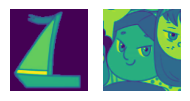

Scale = 0.92 || Value = 11761000.00 || Changed = True


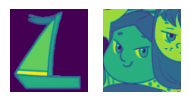

Scale = 0.90 || Value = 11075222.00 || Changed = True


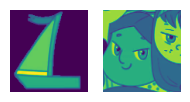

Scale = 0.88 || Value = 10797841.00 || Changed = True


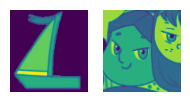

Scale = 0.86 || Value = 9902244.00 || Changed = True


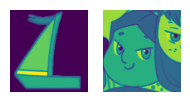

Scale = 0.84 || Value = 9035764.00 || Changed = True


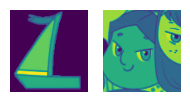

Scale = 0.82 || Value = 8368385.00 || Changed = True


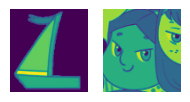

Scale = 0.80 || Value = 8452138.00 || Changed = False


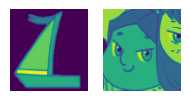

Scale = 0.78 || Value = 7348840.00 || Changed = True


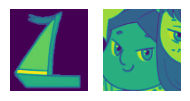

Scale = 0.76 || Value = 7434645.00 || Changed = False


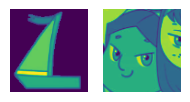

Scale = 0.74 || Value = 6313179.00 || Changed = True


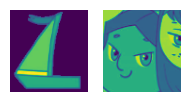

Scale = 0.72 || Value = 6391211.00 || Changed = False


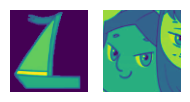

Scale = 0.70 || Value = 6802458.00 || Changed = False


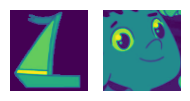

Scale = 0.68 || Value = 6601617.00 || Changed = False


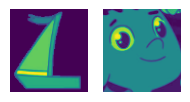

Scale = 0.66 || Value = 5839766.00 || Changed = True


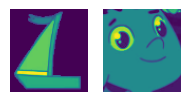

Scale = 0.64 || Value = 4459746.00 || Changed = True


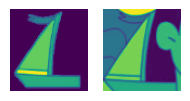

Scale = 0.62 || Value = 4646339.00 || Changed = False


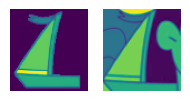

Scale = 0.60 || Value = 4223606.00 || Changed = True


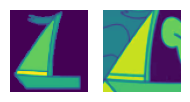

Scale = 0.58 || Value = 4012457.00 || Changed = True


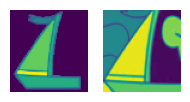

Scale = 0.56 || Value = 3529773.00 || Changed = True


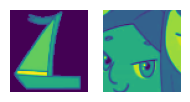

Scale = 1.30 || Value = 70513328.00 || Changed = True


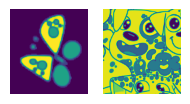

Scale = 1.28 || Value = 69281592.00 || Changed = True


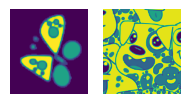

Scale = 1.26 || Value = 66408200.00 || Changed = True


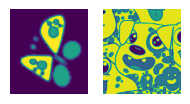

Scale = 1.24 || Value = 63191104.00 || Changed = True


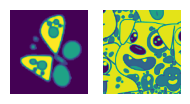

Scale = 1.22 || Value = 59445676.00 || Changed = True


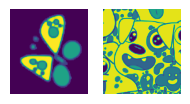

Scale = 1.20 || Value = 57898280.00 || Changed = True


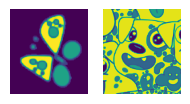

Scale = 1.18 || Value = 55722128.00 || Changed = True


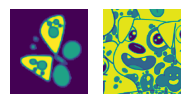

Scale = 1.16 || Value = 53266368.00 || Changed = True


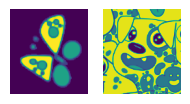

Scale = 1.14 || Value = 53386772.00 || Changed = False


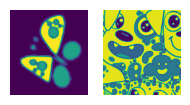

Scale = 1.12 || Value = 50219236.00 || Changed = True


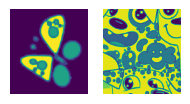

Scale = 1.10 || Value = 47695500.00 || Changed = True


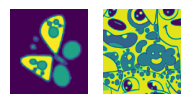

Scale = 1.08 || Value = 44527676.00 || Changed = True


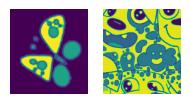

Scale = 1.06 || Value = 42162988.00 || Changed = True


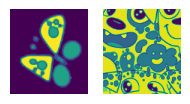

Scale = 1.04 || Value = 41164752.00 || Changed = True


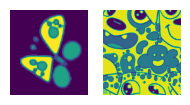

Scale = 1.02 || Value = 36825932.00 || Changed = True


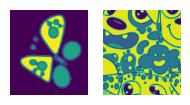

Scale = 1.00 || Value = 39360220.00 || Changed = False


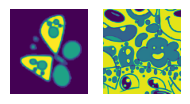

Scale = 0.98 || Value = 36679528.00 || Changed = True


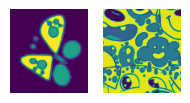

Scale = 0.96 || Value = 34173388.00 || Changed = True


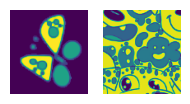

Scale = 0.94 || Value = 31954672.00 || Changed = True


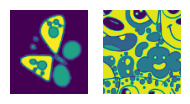

Scale = 0.92 || Value = 30911656.00 || Changed = True


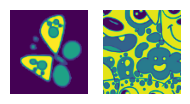

Scale = 0.90 || Value = 27928336.00 || Changed = True


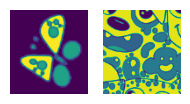

Scale = 0.88 || Value = 26490452.00 || Changed = True


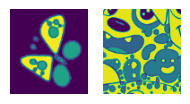

Scale = 0.86 || Value = 25262164.00 || Changed = True


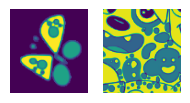

Scale = 0.84 || Value = 23228684.00 || Changed = True


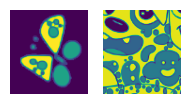

Scale = 0.82 || Value = 21057182.00 || Changed = True


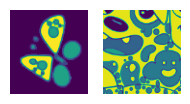

Scale = 0.80 || Value = 16673123.00 || Changed = True


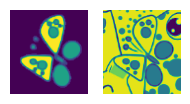

Scale = 0.78 || Value = 11295360.00 || Changed = True


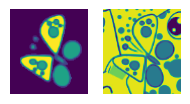

Scale = 0.76 || Value = 11159560.00 || Changed = True


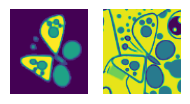

Scale = 0.74 || Value = 13791212.00 || Changed = False


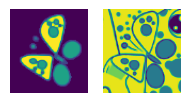

Scale = 0.72 || Value = 14302447.00 || Changed = False


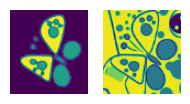

Scale = 0.70 || Value = 13540681.00 || Changed = False


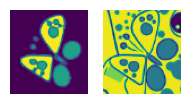

Scale = 0.68 || Value = 14120190.00 || Changed = False


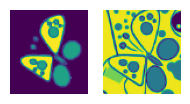

Scale = 0.66 || Value = 12953801.00 || Changed = False


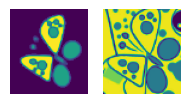

Scale = 0.64 || Value = 12789100.00 || Changed = False


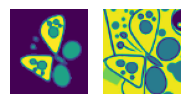

Scale = 0.62 || Value = 12074352.00 || Changed = False


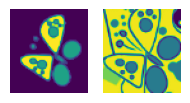

Scale = 0.60 || Value = 11677221.00 || Changed = False


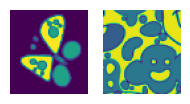

Scale = 0.58 || Value = 10538159.00 || Changed = True


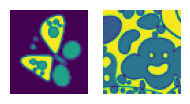

Scale = 0.56 || Value = 9263853.00 || Changed = True


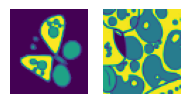

In [54]:
scales = np.arange(1.3, 0.55, -0.02)
print(len(scales))

method = "TM_SQDIFF"

boat_debug = debug(templates=[rmgb_templates[0][7]], meth=method, img=gray_images[0], scales=scales) # [num_temps, num_scales, {}]
butt_debug = debug(templates=[rmgb_templates[1][6]], meth=method, img=gray_images[1], scales=scales) # [num_temps, num_scales, {}]

print('================================================')
for res in boat_debug[0]:
    print(f'Scale = {res['scale']:.2f} || Value = {res['value']:.2f} || Changed = {res['changed']}')
    to_show = [
        res['template_resized'],
        res['roi']
    ]
    show(to_show, figsize=(2, 2))
    
print('================================================')
for res in butt_debug[0]:
    print(f'Scale = {res['scale']:.2f} || Value = {res['value']:.2f} || Changed = {res['changed']}')
    to_show = [
        res['template_resized'],
        res['roi']
    ]
    show(to_show, figsize=(2, 2))

- Xét đến con thuyền, có thể thấy rằng ở `scale = 0.64` đã tìm được vị trí thích hợp, tuy nhiên, ở `scale = 0.56` lại tìm ra vị trí khác 
là sai nhưng lại có số `điểm tốt hơn`.
- Xét đến con bướm, `scale = 0.80` đã cho kết quả chính xác, nhưng lại bị thay thế bởi `scale = 0.6` với số điểm tốt hơn mặc dù là sai.

Có thể nhận xét rằng `scale nhỏ hơn khiến kích thước template nhỏ đi và match vào các vị trí không đúng nhưng lại có độ tương đồng cao hơn 
về màu sắc hoặc đặc điểm nào đó `. Vì thế, cần phải đưa ra phương pháp xử lý vấn đề kiểm tra kết quả sau khi match để xem liệu nó có nên 
được thay đổi hay không.

## 3.3 Cải tiến việc tìm scale hợp lý bằng sử dụng hậu kiểm

In [19]:
def search_best_scale_with_verify_func(img, template_used, mask, meth, scales, show_progress=True, verify_func=None, verify_threshold=0.2):
    """
    Duyệt qua các 'scales' để resize template và mask,
    gọi hàm match_template để lấy kết quả,
    nếu có verify_func, hàm sẽ hậu kiểm từng kết quả trước khi so sánh best_val.

    Args:
        img (np.ndarray): Ảnh gốc.
        template_used (np.ndarray): Template đã chuyển sang đúng color space.
        mask (np.ndarray): Mask nhị phân (nếu hỗ trợ).
        meth (str): Tên phương pháp (ví dụ "TM_CCOEFF_NORMED").
        scales (list[float]): Danh sách scale để resize template.
        show_progress (bool): Hiển thị progress bar.
        verify_func (callable): Hàm hậu kiểm (verify_match). Nếu None thì bỏ qua.
        verify_threshold (float): Tham số ngưỡng cho hàm hậu kiểm.

    Returns:
        best_loc, best_scale, best_min_val, best_max_val
    """
    h, w = template_used.shape[:2]
    method = getattr(cv2, meth)

    # Xác định giá trị khởi tạo tùy vào phương pháp
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        best_val = float('inf')
    else:
        best_val = float('-inf')

    best_loc, best_scale = None, None
    best_min_val, best_max_val = None, None

    iterator = tqdm(scales, unit='scale', desc='\t') if show_progress else scales

    for scale in iterator:
        new_h, new_w = int(h * scale), int(w * scale)
        if new_h < 1 or new_w < 1:
            continue

        template_resized = cv2.resize(template_used, (new_w, new_h), interpolation=cv2.INTER_CUBIC)
        mask_resized = cv2.resize(mask, (new_w, new_h), interpolation=cv2.INTER_CUBIC)

        # Gọi match_template
        res_dict = match_template(img, template_resized, meth, mask=mask_resized)
        min_val, max_val = res_dict["min_val"], res_dict["max_val"]
        loc = res_dict["top_left"]
        cur_best_value = res_dict["best_value"]

        # Nếu có verify_func, kiểm tra. Nếu không đạt => bỏ qua
        if verify_func is not None:
            if not verify_func(img, template_resized, loc, threshold=verify_threshold):
                continue

        if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
            if cur_best_value < best_val:
                best_val = cur_best_value
                best_loc = loc
                best_scale = scale
                best_min_val = min_val
                best_max_val = max_val
        else:
            if cur_best_value > best_val:
                best_val = cur_best_value
                best_loc = loc
                best_scale = scale
                best_min_val = min_val
                best_max_val = max_val

    return best_loc, best_scale, best_min_val, best_max_val

def template_matching_best_scale_with_verify_func(templates, img, meth, scales, show_progress=True, verify_func=None, verify_threshold=0.2):
    """
    Thực hiện Template Matching với nhiều scale khác nhau trên danh sách template,
    có thể kích hoạt bước hậu kiểm bằng verify_match.

    Args:
        templates (list of np.ndarray): Danh sách các template cần tìm trên ảnh.
        img (np.ndarray): Ảnh gốc để thực hiện template matching.
        meth (str): Tên phương pháp template matching, ví dụ "TM_CCOEFF_NORMED".
        scales (list of float): Danh sách tỉ lệ scale để resize (vd: [0.5, 1.0, 1.5]).
        show_progress (bool): Hiển thị tiến trình (tqdm).
        do_verify (bool): Bật/tắt hậu kiểm (True/False).
        verify_threshold (float): Ngưỡng sai số cho hậu kiểm (MSE chuẩn hoá).

    Returns:
        list of dict: Mỗi phần tử chứa thông tin bounding box:
        {
            "top_left": (x, y),
            "bottom_right": (x, y),
            "min_val": float,
            "max_val": float,
            "best_value": float,
            "method": str
        }
    """

    # Xác định kiểu ảnh gốc (color hoặc gray)
    img_color_space = 'rgb' if len(img.shape) > 2 else 'gray'
    method = getattr(cv2, meth)

    results = []
    for i, template in enumerate(templates):
        if show_progress:
            print(f'Template {i + 1}/{len(templates)}')

        # Chuẩn bị template và mask
        template_used, mask = prepare_template_and_mask(template, img_color_space)
        h, w = template_used.shape[:2]

        # Gọi search_best_scale với verify_func nếu do_verify=True
        best_loc, best_scale, best_min_val, best_max_val = search_best_scale_with_verify_func(
            img, template_used, mask, meth, scales,
            show_progress=show_progress,
            verify_func=verify_func,
            verify_threshold=verify_threshold
        )

        if best_loc is None or best_scale is None:
            # Không tìm được match hợp lệ (hoặc fail verify)
            results.append({
                "top_left": (0, 0),
                "bottom_right": (0, 0),
                "min_val": None,
                "max_val": None,
                "best_value": None,
                "method": meth
            })
            continue

        top_left, bottom_right = compute_bounding_box(best_loc, best_scale, w, h)

        if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
            best_value = best_min_val
        else:
            best_value = best_max_val

        results.append({
            "top_left": top_left,
            "bottom_right": bottom_right,
            "min_val": best_min_val,
            "max_val": best_max_val,
            "best_value": best_value,
            "method": meth
        })

    return results

In [ ]:
def verify_func(image, template, top_left, threshold=10):
    """
    Hậu kiểm kết quả match
    """
    h, w = template.shape[:2]
    x, y = top_left
    # Kiểm tra nếu vùng cắt bị vượt biên
    # if y < 0 or y + h > image.shape[0] or x < 0 or x + w > image.shape[1]:
    #     return False

    roi = image[y:y + h, x:x + w]
    # if roi.shape[:2] != (h, w):
    #     return False

    orb = cv2.ORB_create()
    kp1, des1 = orb.detectAndCompute(template, None)
    kp2, des2 = orb.detectAndCompute(roi, None)
    if des1 is None or des2 is None:
        return False
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    matches = bf.match(des1, des2)
    if len(matches) < 4:  # Cần ít nhất 4 matches để tính homography
        return False
    src_pts = np.float32([kp1[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
    dst_pts = np.float32([kp2[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)
    _, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
    inliers = np.sum(mask)
    return inliers > threshold  # Yêu cầu ít nhất 10 inliers

38


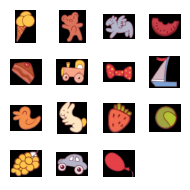

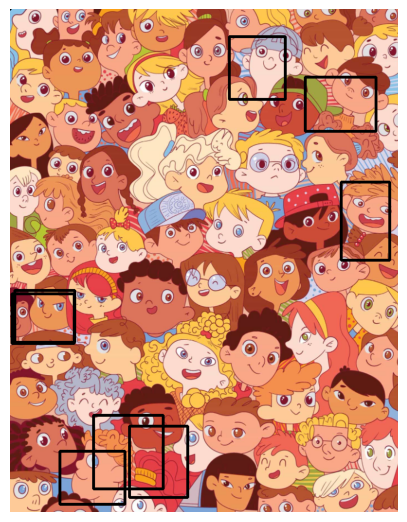

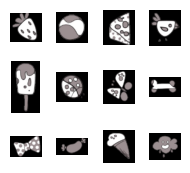

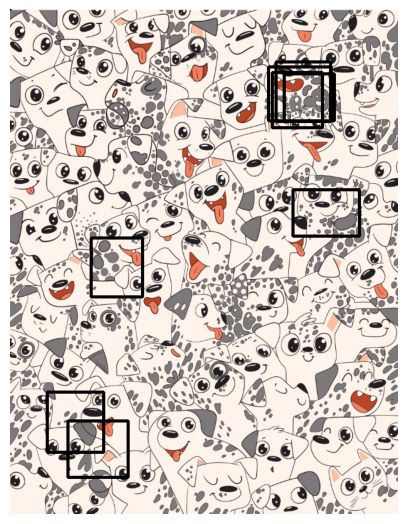

In [58]:
scales = np.arange(1.3, 0.55, -0.02)
print(len(scales))

methods = [
    "TM_SQDIFF"
]

for image, gray_image, template_set in zip(images, gray_images, rmgb_templates):
    img_res = image.copy()
    for i, method in enumerate(methods):
        match_result = template_matching_best_scale_with_verify_func(templates=template_set, 
                                                                     meth=method, img=gray_image, 
                                                                     scales=scales, show_progress=False,
                                                                     verify_func=verify_func, verify_threshold=5)
        img_res = draw_bounding_box(img_res, match_result)   
    show(template_set, figsize=(2, 2)) 
    show(img_res, figsize=(5, 9))

Kết quả còn tệ hơn trước rất nhiều. Có thể là do chưa tìm được cách hậu kiểm hợp lý, vì vậy, chúng ta có thể bỏ qua phương pháp này.